# Ce notebook permet de préparer la table et les variables pour réaliser un score de churn  

In [5]:
import pandas as pd
import numpy as np
import os
repertoire = "/home/jupyter/python_ml/data/"
os.chdir(repertoire)

## Data : score attrition Telco

In [6]:
churn_df = pd.read_csv('churn.csv')
churn_df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [9]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
churn_df.shape


(3333, 21)

In [8]:
churn_df['Area Code']=churn_df['Area Code'].astype(str)
stats = churn_df.describe(include='all')

In [9]:
print(stats)

       State  Account Length Area Code     Phone Int'l Plan VMail Plan  \
count   3333     3333.000000      3333      3333       3333       3333   
unique    51             NaN         3      3333          2          2   
top       WV             NaN       415  409-4462         no         no   
freq     106             NaN      1655         1       3010       2411   
mean     NaN      101.064806       NaN       NaN        NaN        NaN   
std      NaN       39.822106       NaN       NaN        NaN        NaN   
min      NaN        1.000000       NaN       NaN        NaN        NaN   
25%      NaN       74.000000       NaN       NaN        NaN        NaN   
50%      NaN      101.000000       NaN       NaN        NaN        NaN   
75%      NaN      127.000000       NaN       NaN        NaN        NaN   
max      NaN      243.000000       NaN       NaN        NaN        NaN   

        VMail Message     Day Mins    Day Calls   Day Charge  ...  \
count     3333.000000  3333.000000  3333.0

In [10]:
# On récupère les colonnes et on les stocke dans une liste
col_names = churn_df.columns.tolist()
print( "Column names:")
print(col_names)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [11]:
# Création d'un vecteur y contenant la variable cible binarisée
y = np.array((churn_df['Churn?'] == 'True.'))
# ou
#y = np.where(churn_df['Churn?'] == 'True.',1,0)
print(y.mean())
# 14.5% de churners


0.14491449144914492


In [13]:
pd.crosstab(y, columns = 'count',normalize='all')

col_0,count
row_0,
False,0.855086
True,0.144914


In [14]:
#	En %
print(pd.crosstab(y, columns = 'count', normalize=True))
# col area
print(pd.crosstab(churn_df['Area Code'],y, normalize='index'))
#print(pd.crosstab(churn_df['Area Code'],y).apply(lambda r: r/r.sum(), axis=1))
# flat mais pour la pédagogie on va quand même l'encoder

col_0     count
row_0          
False  0.855086
True   0.144914
col_0         False     True 
Area Code                    
408        0.854415  0.145585
415        0.857402  0.142598
510        0.851190  0.148810


In [15]:

# par contre les deux var qui indiquent si le client paie pour un service international ou VM sont très discriminantes
print(pd.crosstab(churn_df["Int'l Plan"],y, normalize='index'))
print(pd.crosstab(churn_df["VMail Plan"],y, normalize='index'))

col_0          False     True 
Int'l Plan                    
no          0.885050  0.114950
yes         0.575851  0.424149
col_0          False     True 
VMail Plan                    
no          0.832849  0.167151
yes         0.913232  0.086768


In [16]:
 #  les dummies
print(pd.get_dummies(churn_df['Area Code'],prefix='area_', drop_first=True))
# jointure selon l'index des lignes (par défaut )
churn_df = pd.concat([churn_df,pd.get_dummies(churn_df['Area Code'],prefix='area_', drop_first=True)],axis=1)
#  drop l'original
churn_df.drop(['Area Code'],axis=1, inplace=True)

      area__415  area__510
0             1          0
1             1          0
2             1          0
3             0          0
4             1          0
...         ...        ...
3328          1          0
3329          1          0
3330          0          1
3331          0          1
3332          1          0

[3333 rows x 2 columns]


In [17]:
del _churn_df , repertoire
# ALTERNATIVE A GET_DUMMIES
#from sklearn.preprocessing import OneHotEncoder
#onehot_encoder = OneHotEncoder(sparse=False)
#area_2d = np.array(churn_df['Area Code']).reshape(len(churn_df['Area Code']), 1)
#area = onehot_encoder.fit_transform(area_2d)

In [18]:
# étude du state
#print(pd.crosstab(churn_df['State'],y))
print(pd.crosstab(churn_df['State'],y,normalize='index'))
#print(pd.crosstab(churn_df['State'],y).apply(lambda r: r/r.sum(), axis=1))

col_0     False     True 
State                    
AK     0.942308  0.057692
AL     0.900000  0.100000
AR     0.800000  0.200000
AZ     0.937500  0.062500
CA     0.735294  0.264706
CO     0.863636  0.136364
CT     0.837838  0.162162
DC     0.907407  0.092593
DE     0.852459  0.147541
FL     0.873016  0.126984
GA     0.851852  0.148148
HI     0.943396  0.056604
IA     0.931818  0.068182
ID     0.876712  0.123288
IL     0.913793  0.086207
IN     0.873239  0.126761
KS     0.814286  0.185714
KY     0.864407  0.135593
LA     0.921569  0.078431
MA     0.830769  0.169231
MD     0.757143  0.242857
ME     0.790323  0.209677
MI     0.780822  0.219178
MN     0.821429  0.178571
MO     0.888889  0.111111
MS     0.784615  0.215385
MT     0.794118  0.205882
NC     0.838235  0.161765
ND     0.903226  0.096774
NE     0.918033  0.081967
NH     0.839286  0.160714
NJ     0.735294  0.264706
NM     0.903226  0.096774
NV     0.787879  0.212121
NY     0.819277  0.180723
OH     0.871795  0.128205
OK     0.852

In [19]:
len(churn_df['State'].unique())
# 51 valeurs
# soit on garde et on crée des dummy
# soit on fait une stratégie qui consiste à remplacer la modalité par le taux de 1
# par contre il faut le faire sur l'ech dapp sinon on triche


51

## Feature engineering sur la variable STATE

In [28]:
# split Apprentissage Test
from sklearn.model_selection import train_test_split 
state_train, state_test, y_train, y_test = train_test_split(churn_df['State'],y, test_size=0.4)

In [29]:
taux_reponse_state_train=pd.crosstab(state_train,y_train).apply(lambda r: r/r.sum(), axis=1)[1]
taux_reponse_state_test=pd.crosstab(state_test,y_test).apply(lambda r: r/r.sum(), axis=1)[1]
del state_test,y_test,  taux_reponse_state_test
del state_train

In [26]:
print(taux_reponse_state_train)
print(taux_reponse_state_test)

State
AK    0.085714
AL    0.088889
AR    0.166667
AZ    0.081081
CA    0.150000
CO    0.195652
CT    0.148936
DC    0.081081
DE    0.184211
FL    0.216216
GA    0.096774
HI    0.035714
IA    0.041667
ID    0.152174
IL    0.103448
IN    0.121951
KS    0.204545
KY    0.128205
LA    0.088235
MA    0.058824
MD    0.272727
ME    0.256410
MI    0.162162
MN    0.204545
MO    0.081081
MS    0.333333
MT    0.214286
NC    0.227273
ND    0.054054
NE    0.032258
NH    0.212121
NJ    0.232558
NM    0.069767
NV    0.263158
NY    0.129630
OH    0.104167
OK    0.100000
OR    0.200000
PA    0.225806
RI    0.102564
SC    0.189189
SD    0.138889
TN    0.133333
TX    0.255814
UT    0.159091
VA    0.057692
VT    0.108696
WA    0.195652
WI    0.125000
WV    0.132075
WY    0.086957
Name: True, dtype: float64
State
AK    0.000000
AL    0.114286
AR    0.263158
AZ    0.037037
CA    0.428571
CO    0.000000
CT    0.185185
DC    0.117647
DE    0.086957
FL    0.000000
GA    0.217391
HI    0.080000
IA    0.100000
I

In [30]:
# on remplace le state par le taux de reponse associé
print(list(taux_reponse_state_train))
# replace une liste par une liste
churn_df['State'].replace(list(taux_reponse_state_train.index), list(taux_reponse_state_train), inplace=True)
churn_df.rename(columns={"State": "churnMoy_state"},inplace=True)

[0.0, 0.10416666666666667, 0.29411764705882354, 0.11428571428571428, 0.28, 0.16279069767441862, 0.10869565217391304, 0.05714285714285714, 0.16216216216216217, 0.1724137931034483, 0.18181818181818182, 0.06666666666666667, 0.03571428571428571, 0.12244897959183673, 0.1111111111111111, 0.15555555555555556, 0.12195121951219512, 0.14705882352941177, 0.05555555555555555, 0.2647058823529412, 0.18421052631578946, 0.23529411764705882, 0.17391304347826086, 0.1864406779661017, 0.05263157894736842, 0.13157894736842105, 0.20833333333333334, 0.13043478260869565, 0.14285714285714285, 0.0975609756097561, 0.16666666666666666, 0.2777777777777778, 0.04878048780487805, 0.23404255319148937, 0.11538461538461539, 0.1794871794871795, 0.1875, 0.1951219512195122, 0.20833333333333334, 0.11764705882352941, 0.23684210526315788, 0.13157894736842105, 0.1, 0.29545454545454547, 0.10638297872340426, 0.023255813953488372, 0.15, 0.22857142857142856, 0.10638297872340426, 0.05555555555555555, 0.11320754716981132]


In [31]:


# X
to_drop=['Phone','Churn?']
churn_X = churn_df.drop(to_drop,axis=1)
churn_X.describe()
# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_X[yes_no_cols] = churn_X[yes_no_cols] == 'yes'


In [19]:
# supprime les objets intermédiaires
del to_drop,yes_no_cols

In [39]:
churn_X.dtypes

churnMoy_state    float64
Account Length      int64
Int'l Plan           bool
VMail Plan           bool
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
area__415           uint8
area__510           uint8
dtype: object

In [35]:
# Stocke les noms des X 
features = list(churn_X.columns)

churnMoy_state    float64
Account Length      int64
Int'l Plan           bool
VMail Plan           bool
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
area__415           uint8
area__510           uint8
dtype: object

In [37]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler().fit(churn_X) # modèle
X = norm.transform(churn_X) # X données cr

In [21]:
# Normalisation 
from sklearn.preprocessing import StandardScaler

# centrer réduire (données doivent être float et pas int)
norm=StandardScaler().fit(churn_X.astype(float))

# on applique le centrage réduction
X = norm.transform(churn_X.astype(float))

# on aurait pu écrire : X=StandardScaler().fit_transform(churn_X.astype(float))

In [42]:
# X en dataframe
X = pd.DataFrame(X)
# on récupère les noms de col
X.columns = churn_X.columns
X.dtypes
print ("Feature space holds %d observations and %d features" % X.shape)
print ( "Unique target labels:", np.unique(y))

del taux_reponse_state_train,churn_X,y_train

Feature space holds 3333 observations and 20 features
Unique target labels: [False  True]


## Partition Apprentissage Test

In [43]:
# split Apprentissage Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=123)

## Analyse distribution des variables

In [26]:
# 14.4% de churners
y.mean()
X.describe()

,churnMoy_state,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,area__415,area__510
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,3.694415e-16,1.713134e-16,-1.021951e-16,6.921823e-17,3.832651e-16,7.081711e-16,-2.150828e-16,-3.226409e-16,-1.067919e-16,3.527531e-16,1.266447e-16,6.602046e-17,-7.041739e-17,-3.134473e-17,-3.274375e-16,-1.264615e-16,2.785384e-16,3.275708e-16,8.076348e-16,3.511209e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-1.882355e+00,-2.513172e+00,-3.275805e-01,-6.183963e-01,-5.917599e-01,-3.301096e+00,-5.005247e+00,-3.301162e+00,-3.963622e+00,-5.025911e+00,-3.963679e+00,-3.513648e+00,-3.429870e+00,-3.515366e+00,-3.667413e+00,-1.820289e+00,-3.668210e+00,-1.188218e+00,-9.931230e-01,-5.804683e-01
25%,-6.730589e-01,-6.797448e-01,-3.275805e-01,-6.183963e-01,-5.917599e-01,-6.624241e-01,-6.695701e-01,-6.623760e-01,-6.780300e-01,-6.583610e-01,-6.783123e-01,-6.698545e-01,-6.699340e-01,-6.676792e-01,-6.223690e-01,-6.011951e-01,-6.164341e-01,-4.279320e-01,-9.931230e-01,-5.804683e-01
50%,-2.627621e-01,-1.627644e-03,-3.275805e-01,-6.183963e-01,-5.917599e-01,-6.887677e-03,2.812491e-02,-6.730063e-03,8.276141e-03,-5.738630e-03,8.459274e-03,6.485803e-03,-5.505089e-03,4.691242e-03,2.246393e-02,-1.948306e-01,2.045823e-02,-4.279320e-01,-9.931230e-01,-5.804683e-01
75%,6.237517e-01,6.513740e-01,-3.275805e-01,1.617086e+00,8.695542e-01,6.725198e-01,6.759846e-01,6.726790e-01,6.768330e-01,6.970854e-01,6.766695e-01,6.808485e-01,6.589239e-01,6.814562e-01,6.672969e-01,6.178983e-01,6.706192e-01,3.323545e-01,1.006925e+00,1.722747e+00
max,3.064764e+00,3.564766e+00,3.052685e+00,1.617086e+00,3.134591e+00,3.140422e+00,3.217588e+00,3.140803e+00,3.209066e+00,3.508382e+00,3.207980e+00,3.839081e+00,3.827739e+00,3.836763e+00,3.497397e+00,6.307001e+00,3.496829e+00,5.654360e+00,1.006925e+00,1.722747e+00


In [44]:
#concatenation X et y pour utiliser la fonction boxplot
Xy = pd.concat([X,pd.DataFrame(y)], axis = 1)
# noms des variables 
Xy.columns=features+['Churn?']


In [28]:
import pickle
file=open("churn_prepared.pydata","wb")
pickle.dump(Xy,file)
file.close()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff964759e90>,
      dtype=object)

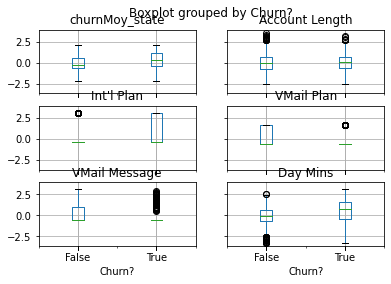

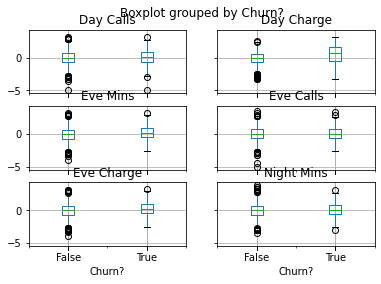

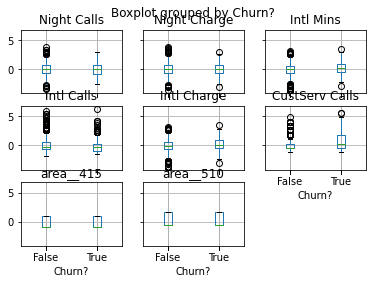

In [45]:
#box plot
#Xy.boxplot(column = ['Account Length'], by = 'Churn?')
Xy.boxplot(column = features[0:6], by = 'Churn?')
Xy.boxplot(column = features[6:12], by = 'Churn?')
Xy.boxplot(column = features[12:], by = 'Churn?')

In [30]:
# tri croisé des var quali

for i in ("Int'l Plan","VMail Plan","area__415","area__510"):
     print(pd.crosstab(X[""+str(i)],y))
     print(pd.crosstab(X[""+str(i)],y).apply(lambda r: r/r.sum(), axis=1))

col_0       False  True 
Int'l Plan              
-0.327580    2664    346
 3.052685     186    137
col_0          False     True 
Int'l Plan                    
-0.327580   0.885050  0.114950
 3.052685   0.575851  0.424149
col_0       False  True 
VMail Plan              
-0.618396    2008    403
 1.617086     842     80
col_0          False     True 
VMail Plan                    
-0.618396   0.832849  0.167151
 1.617086   0.913232  0.086768
col_0      False  True 
area__415              
-0.993123   1431    247
 1.006925   1419    236
col_0         False     True 
area__415                    
-0.993123  0.852801  0.147199
 1.006925  0.857402  0.142598
col_0      False  True 
area__510              
-0.580468   2135    358
 1.722747    715    125
col_0         False     True 
area__510                    
-0.580468  0.856398  0.143602
 1.722747  0.851190  0.148810
